## Imports


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from IPython.display import display 

Dataset is from https://www.kaggle.com/nehaprabhavalkar/indian-food-101
 

## Load and Explore

In [3]:
df = pd.read_csv("indian_food.csv")

In [4]:
print(list(df.columns),'\n')

display(df.head())
print()
display(df.describe())
print() 

['name', 'ingredients', 'diet', 'prep_time', 'cook_time', 'flavor_profile', 'course', 'state', 'region'] 



,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [5]:
print(df['diet'].value_counts(),'\n')

print(df['flavor_profile'].value_counts(),'\n')

region_group = df.groupby(['region'])
region_group['diet'].value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64 

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64 



region      diet          
-1          vegetarian        13
Central     vegetarian         3
East        vegetarian        26
            non vegetarian     5
North       vegetarian        44
            non vegetarian     5
North East  non vegetarian    13
            vegetarian        12
South       vegetarian        56
            non vegetarian     3
West        vegetarian        71
            non vegetarian     3
Name: diet, dtype: int64

## Preprocess


-1 values are NaN, replace them

In [6]:
df = df.replace([-1,"-1"]  ,np.nan)
print(df.describe())

        prep_time   cook_time
count  225.000000  227.000000
mean    35.386667   38.911894
std     76.241081   49.421711
min      5.000000    2.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   45.000000
max    500.000000  720.000000


In [7]:
df["ingredients"] = df["ingredients"].apply(lambda x: x.lower().split(', ')) #Store ingredients as lists
print(df["ingredients"].head())

0                    [maida flour, yogurt, oil, sugar]
1                            [gram flour, ghee, sugar]
2       [carrots, milk, sugar, ghee, cashews, raisins]
3    [flour, ghee, kewra, milk, clarified butter, s...
4    [milk powder, plain flour, baking powder, ghee...
Name: ingredients, dtype: object


## Count ingredients

In [8]:
ingr_counter = Counter()
df['ingredients'].apply(lambda x: ingr_counter.update(x))
print(ingr_counter.most_common(15)) # print the most common 15 ingredients with frequency.

[('sugar', 48), ('ginger', 29), ('garam masala', 27), ('ghee', 25), ('curry leaves', 25), ('urad dal', 25), ('milk', 21), ('rice flour', 21), ('jaggery', 19), ('chana dal', 16), ('tomato', 16), ('gram flour', 13), ('garam masala powder', 13), ('coconut', 12), ('wheat flour', 12)]


## Bar Plot

Let's plot frequencies of the most common ingredients.

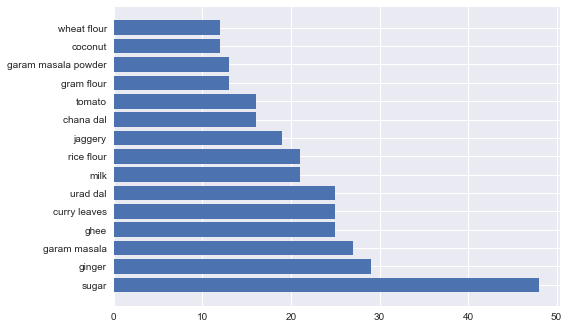

In [9]:
plt.style.use('seaborn')
unzip_list = list(zip(*ingr_counter.most_common(15)))
plt.barh(unzip_list[0],unzip_list[1])
plt.show()

## Scatter Plot 

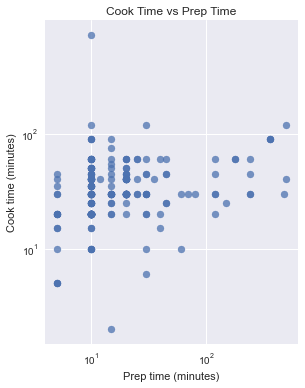

In [10]:

plt.scatter(x= df ['prep_time'], y = df['cook_time'],alpha=0.75)
plt.title("Cook Time vs Prep Time")
plt.xlabel('Prep time (minutes)')
plt.ylabel('Cook time (minutes)')
plt.xscale('log')
plt.yscale('log')
plt.axis('scaled')

plt.tight_layout()
plt.show()